<a href="https://colab.research.google.com/github/mauro-nievoff/Procesamiento-de-Imagenes/blob/main/TP7_Nievas_Offidani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctico 7 - Procesamiento Digital de Imágenes

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

# from tp7_functions import *

%matplotlib inline

Imageio: 'camera.png' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/camera.png (136 kB)
Downloading: 8192/139512 bytes (5.9%)139512/139512 bytes (100.0%)
  Done
File saved as /root/.imageio/images/camera.png.


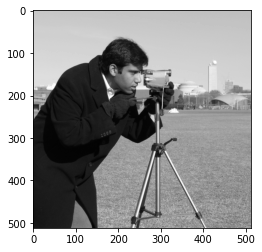

In [2]:
img = imageio.imread('imageio:camera.png')/255

plt.imshow(img, 'gray')

# Remuestreo, reconstrucción y cuantización

Para cada uno de los siguientes incisos, definir una función que haga las tareas especificadas sobre una imagen en escala de grises.

## 1. Upsampling / Downsampling x2

### 1.1. Definir una función que haga un downsampling x2 de la imagen de entrada:

1. Sampling cada 2 pixeles:

In [3]:
def nn_downsampling_x2(imagen):
  return imagen[::2,::2]

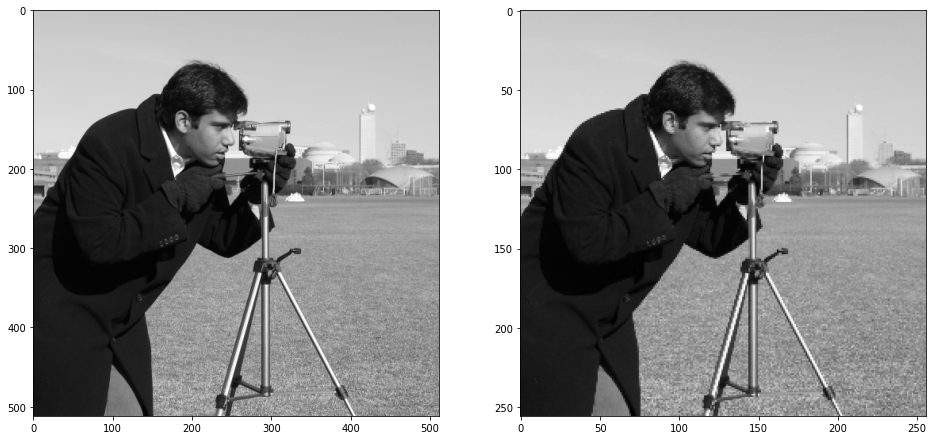

In [4]:
img_nn_downsampling = nn_downsampling_x2(img)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img, 'gray')
axes[1].imshow(img_nn_downsampling, 'gray')

2. Promedio de una cuadrícula de 2x2

In [5]:
def avg_downsampling_x2(imagen):
  return (imagen[::2,::2] +
          imagen[1::2,::2] +
          imagen[::2,1::2] +
          imagen[1::2,1::2]) / 4

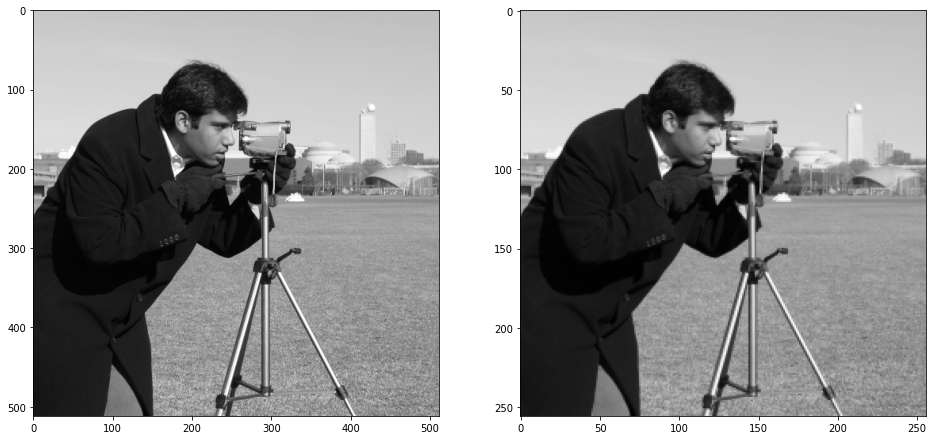

In [6]:
img_avg_downsampling = avg_downsampling_x2(img)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img, 'gray')
axes[1].imshow(img_avg_downsampling, 'gray')

3. Filtro gaussiano + sampling cada 2 pixeles

In [7]:
import scipy.stats as st
from scipy.signal import convolve2d

def gaussian_nn_downsampling_x2(imagen, std=1):

  def crear_kernel_gaussiano(std, N = 3):

    x = np.linspace(-std, std, N+1)
    kern1d = np.diff(st.norm.cdf(x))
    kernel = np.outer(kern1d, kern1d)
    kernel /= kernel.sum()

    return kernel

  return convolve2d(nn_downsampling_x2(imagen),
                    crear_kernel_gaussiano(std = std),
                    'same')

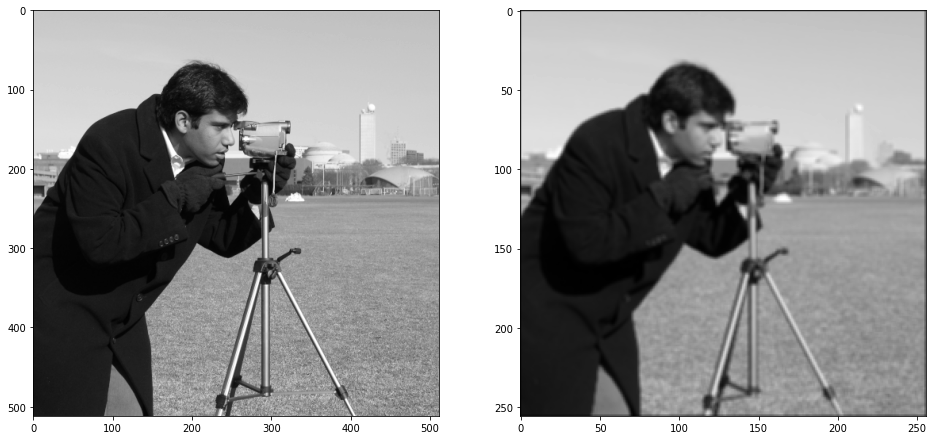

In [8]:
img_gaussian_downsampling = gaussian_nn_downsampling_x2(img, std=1)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img, 'gray')
axes[1].imshow(img_gaussian_downsampling, 'gray')

### 1.2. Definir una función que haga un upsampling x2 de la imagen de entrada:

1. Repetir pixeles en una grilla de 2x2

In [9]:
img2 = nn_downsampling_x2(nn_downsampling_x2(img))

In [10]:
def nn_upsampling_x2(imagen):
  return np.repeat(imagen, 2, axis=1).repeat(2, axis=0)

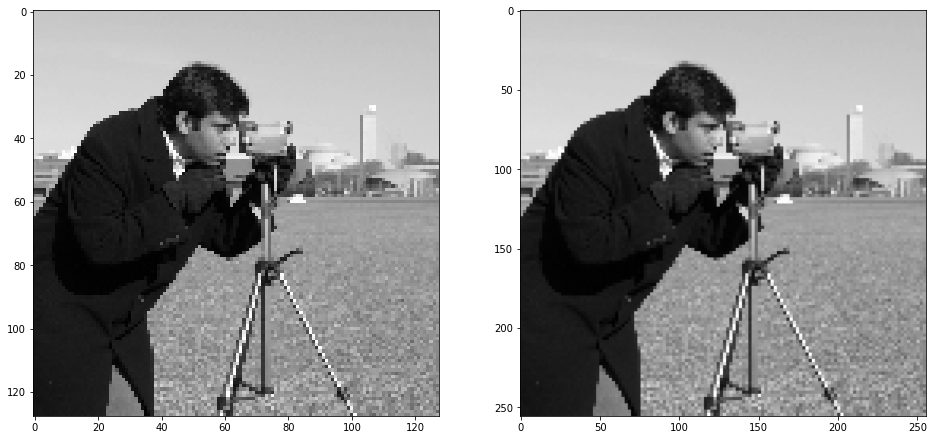

In [11]:
img_nn_upsampling = nn_upsampling_x2(img2)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img2, 'gray')
axes[1].imshow(img_nn_upsampling, 'gray')

2. Interpolación bilineal

In [12]:
def bilinear_upsampling_x2(imagen):
  imagen_expandida = np.zeros(tuple([d*2 for d in imagen.shape]))
  for i in range(imagen.shape[0]):
    for j in range(imagen.shape[1]):
      imagen_expandida[2*i,2*j] = imagen[i,j]
  kernel_bilinear = np.array([[1/4, 1/2, 1/4], [1/2, 1, 1/2], [1/4, 1/2, 1/4]])
  return convolve2d(imagen_expandida, kernel_bilinear, 'same')

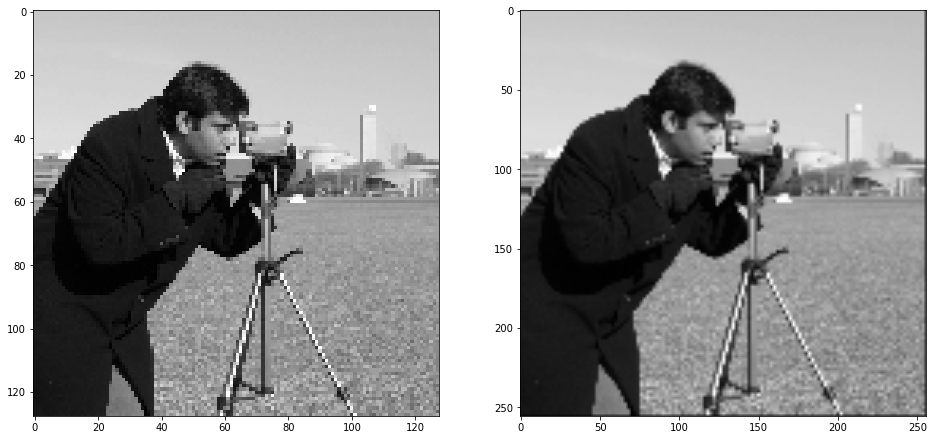

In [13]:
img_bilinear_upsampling = bilinear_upsampling_x2(img2)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img2, 'gray')
axes[1].imshow(img_bilinear_upsampling, 'gray')

3. Interpolación bicúbica

In [14]:
from scipy.ndimage import convolve1d

def bicubic_upsampling_x2(imagen):
  imagen_expandida = np.zeros(tuple([d*2 for d in imagen.shape]))
  for i in range(imagen.shape[0]):
    for j in range(imagen.shape[1]):
      imagen_expandida[2*i,2*j] = imagen[i,j]
  kernel_bicubico = np.array([-1/8, 0, 5/8, 1, 5/8, 0, -1/8])
  convol_1 = convolve1d(imagen_expandida, kernel_bicubico)
  convol_2 = np.rot90(convolve1d(np.rot90(imagen_expandida), kernel_bicubico), 3)
  nueva_imagen = imagen_expandida
  for i in range(imagen.shape[0]):
    for j in range(imagen.shape[1]):
      nueva_imagen[2*i,2*j+1] = convol_1[2*i,2*j+1]
      nueva_imagen[2*i+1,2*j] = convol_2[2*i+1,2*j]
  convol_3 = convolve1d(nueva_imagen, kernel_bicubico) 
  for i in range(imagen.shape[0]):
    for j in range(imagen.shape[1]):
      nueva_imagen[2*i+1,2*j+1] = convol_3[2*i+1,2*j+1]  
  return nueva_imagen

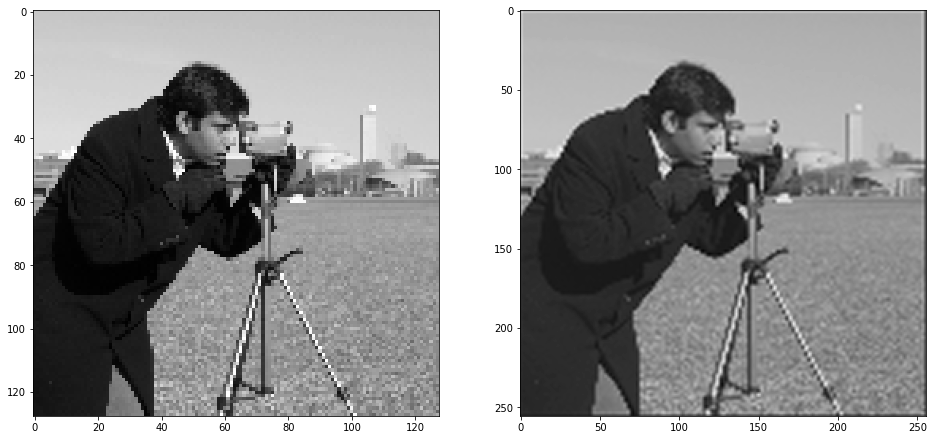

In [15]:
img_bicubic_upsampling = bicubic_upsampling_x2(img2)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img2, 'gray')
axes[1].imshow(img_bicubic_upsampling, 'gray')

4. Repetir pixeles en una grilla de 2x2 y aplicar filtro gaussiano

In [18]:
def gaussian_nn_upsampling_x2(imagen, std=1):

  def crear_kernel_gaussiano(std, N = 3):

    x = np.linspace(-std, std, N+1)
    kern1d = np.diff(st.norm.cdf(x))
    kernel = np.outer(kern1d, kern1d)
    kernel /= kernel.sum()

    return kernel

  return convolve2d(nn_upsampling_x2(imagen),
                    crear_kernel_gaussiano(std = std),
                    'same')

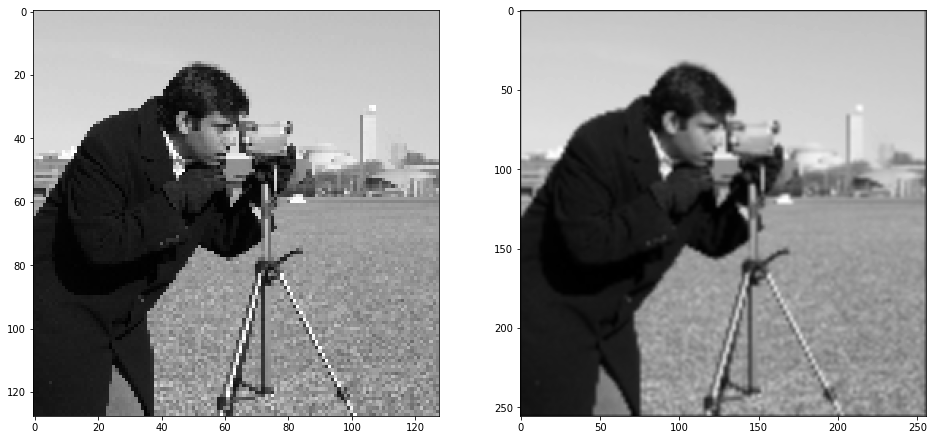

In [19]:
img_gaussian_upsampling = gaussian_nn_upsampling_x2(img2)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img2, 'gray')
axes[1].imshow(img_gaussian_upsampling, 'gray')

## 2. Downsampling/Upsampling usando FFT

1. Upsampling: Calcular la transformada de Fourier de la imagen, agregar un padding de ceros alrededor del espectro para obtener el tamaño de imagen deseado y antitransformar el espectro con padding

2. Downsampling: Calcular la transformada de Fourier de la imagen, recortar los bordes del espectro al tamaño deseado y antitransformar el espectro recortado

In [20]:
def reshape(imagen, new_shape):

  if imagen.shape[0] >= new_shape[0]:
    margen_inicial_0 = (imagen.shape[0] - new_shape[0])//2
    margen_final_0 = -1 * (imagen.shape[0] - new_shape[0] - margen_inicial_0)
    imagen = imagen[margen_inicial_0:margen_final_0,:]
  elif imagen.shape[0] < new_shape[0]:
    margen_inicial_0 = (new_shape[0] - imagen.shape[0])//2
    margen_final_0 = -1 * (new_shape[0] - imagen.shape[0] - margen_inicial_0)
    array_inicial_0 = np.zeros((margen_inicial_0,tf_imagen.shape[1]))
    array_final_0 = np.zeros((-1 * margen_final_0,tf_imagen.shape[1]))
    imagen = np.append(array_inicial_0, imagen, axis = 0)
    imagen = np.append(imagen, array_final_0, axis = 0)
  if imagen.shape[1] >= new_shape[1]:
    margen_inicial_1 = (imagen.shape[1] - new_shape[1])//2
    margen_final_1 = -1 * (imagen.shape[1] - new_shape[1] - margen_inicial_1)
    imagen = imagen[:,margen_inicial_1:margen_final_1] 
  elif imagen.shape[1] < new_shape[1]:
    margen_inicial_1 = (new_shape[1] - imagen.shape[1])//2
    margen_final_1 = -1 * (new_shape[1] - imagen.shape[1] - margen_inicial_1)
    array_inicial_1 = np.zeros((imagen.shape[0], margen_inicial_1))
    array_final_1 = np.zeros((imagen.shape[0], -1 * margen_final_1))
    imagen = np.append(array_inicial_1, imagen, axis = 1)
    imagen = np.append(imagen, array_final_1, axis = 1)

  return imagen

def fft_resampling(imagen, new_shape):

  tf_imagen = np.fft.fftshift(np.fft.fft2(imagen))
  tf_imagen = reshape(tf_imagen, new_shape)
  nueva_imagen = np.fft.ifft2(np.fft.ifftshift(tf_imagen))

  return nueva_imagen.real

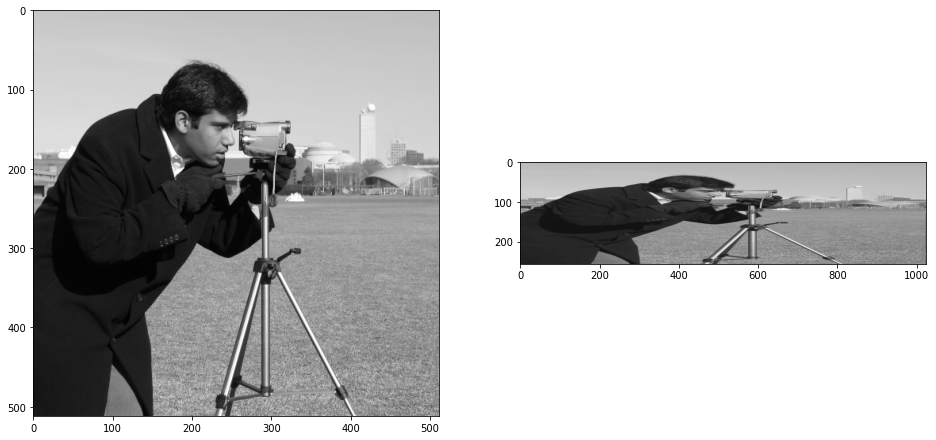

In [21]:
new_shape = (img.shape[0]//2, img.shape[1]*2)

img_fft_resampling = fft_resampling(img, new_shape)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img, 'gray')
axes[1].imshow(img_fft_resampling, 'gray')

## 3. Cuantización

Cuantizar los niveles de grises de la imagen.

Imageio: 'coffee.png' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/coffee.png (441 kB)
Downloading: 8192/451102 bytes (1.8%)451102/451102 bytes (100.0%)
  Done
File saved as /root/.imageio/images/coffee.png.


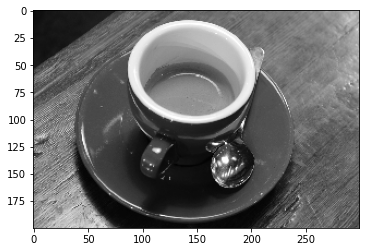

In [22]:
img_cuant = imageio.imread('imageio:coffee.png').mean(axis=2)/255
img_cuant = nn_downsampling_x2(img_cuant)

plt.imshow(img_cuant, 'gray')

1. Cuantización uniforme

In [23]:
def cuantize_uniform(imagen, levels):
  return np.round(imagen*(levels -1))/(levels-1)

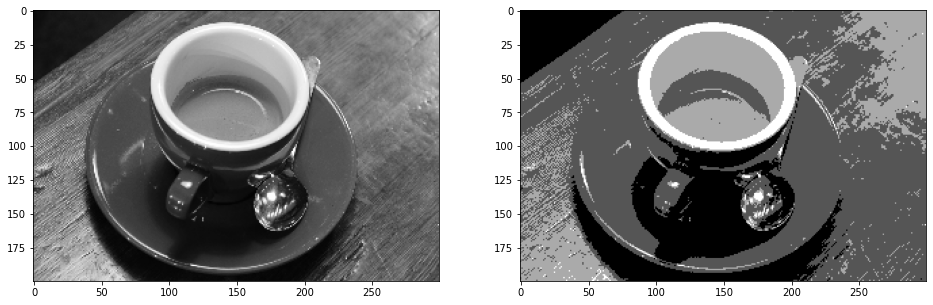

In [24]:
img_cuantize_uniform = cuantize_uniform(img_cuant, levels = 4)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img_cuant, 'gray')
axes[1].imshow(img_cuantize_uniform, 'gray')

2. Difusión del error por scanline

In [25]:
def cuantize_dithering_scanline(imagen, levels):

  nueva_imagen = np.copy(imagen)

  for i in range(nueva_imagen.shape[0]):
    for j in range(nueva_imagen.shape[1]):
      oldpixel = nueva_imagen[i,j]
      newpixel = np.round(oldpixel*(levels -1))/(levels-1)
      nueva_imagen[i,j] = newpixel
      quant_error = oldpixel - newpixel
      if j != nueva_imagen.shape[1]-1:
        nueva_imagen[i,j+1] = nueva_imagen[i,j+1] + quant_error
  return nueva_imagen

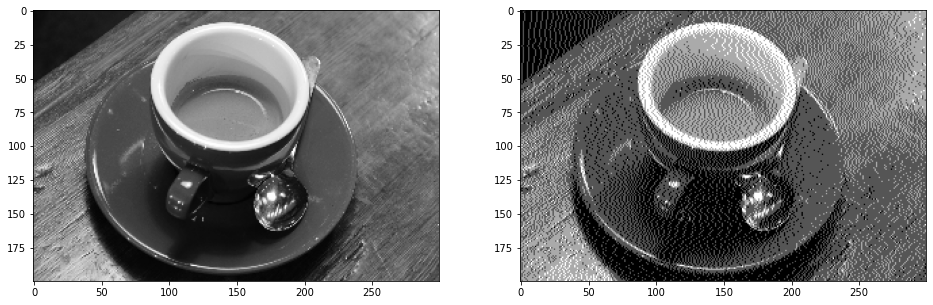

In [26]:
img_scanline = cuantize_dithering_scanline(img_cuant, levels = 4)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img_cuant, 'gray')
axes[1].imshow(img_scanline, 'gray')

3. Dithering de Floyd-Steinberg

In [27]:
def cuantize_floyd_steinberg(imagen, levels):

  nueva_imagen = np.copy(imagen)

  for i in range(nueva_imagen.shape[0]):
    for j in range(nueva_imagen.shape[1]):
      oldpixel = nueva_imagen[i,j].copy()
      newpixel = np.round(oldpixel*(levels -1))/(levels-1)
      nueva_imagen[i,j] = newpixel
      quant_error = oldpixel - newpixel
      if j != nueva_imagen.shape[1]-1:
        nueva_imagen[i,j+1] = nueva_imagen[i,j+1] + quant_error * 7 / 16
      if i != nueva_imagen.shape[0]-1:
        if j != 0:
          nueva_imagen[i+1,j-1] = nueva_imagen[i+1,j-1] + quant_error * 3 / 16
        nueva_imagen[i+1,j] = nueva_imagen[i+1,j] + quant_error * 5 / 16
        if j != nueva_imagen.shape[1]-1:
          nueva_imagen[i+1,j+1] = nueva_imagen[i+1,j+1] + quant_error * 1 / 16     
  return nueva_imagen

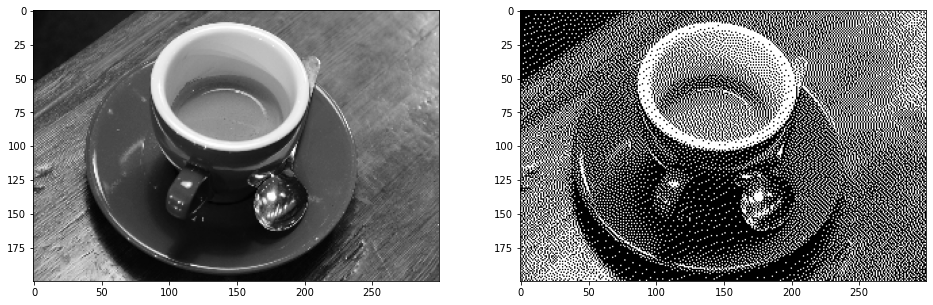

In [38]:
img_floyd_steinberg = cuantize_floyd_steinberg(img_cuant, levels = 2)
            
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img_cuant, 'gray')
axes[1].imshow(img_floyd_steinberg, 'gray')

La imagen que resulta de la función cuantize_floyd_steinberg() es distinta a la respuesta esperada (ver abajo). No logré encontrar el error en el código para reducir el ruido sal y pimienta.

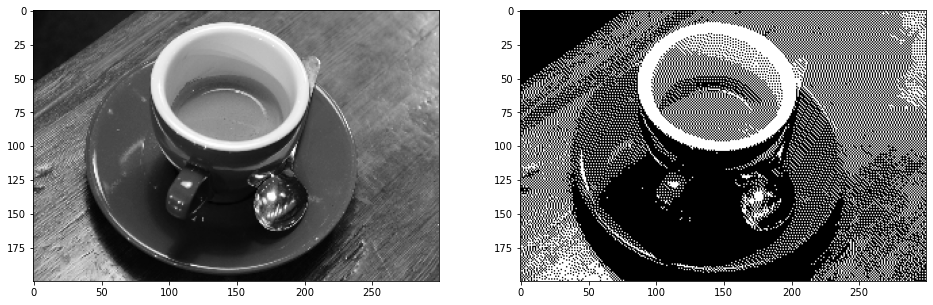

In [ ]:
img2 = cuantize_floyd_steinberg(img, 2)
            
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img, 'gray')
axes[1].imshow(img2, 'gray')